In [18]:
#!pip install prettify
#!pip install htmltext
#!pip install folium
#!pip install regex
import pandas as pd
import folium
import numpy as np
#import regex as re
#import lxml
#from lxml.html.soupparser import fromstring
#import prettify
#import numbers
#import htmltext
from bs4 import BeautifulSoup
import requests
import json


In [4]:
Crimedata_path = 'https://data.austintexas.gov/resource/fdj4-gpfu.csv'
CrimeData = pd.read_csv( Crimedata_path) 

CrimeData.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,census_tract,clearance_status,clearance_date,ucr_category,category_description,x_coordinate,y_coordinate,latitude,longitude,location
0,20121171927,RECKLESS DAMAGE,1401,N,2012-04-26T22:34:00.000,2012-04-26T00:00:00.000,2234.0,2012-04-26T23:04:00.000,2012-04-26T00:00:00.000,2304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006471156,FAMILY DISTURBANCE,3400,N,2006-02-16T14:25:00.000,2006-02-16T00:00:00.000,1425.0,2006-02-16T14:25:00.000,2006-02-16T00:00:00.000,1425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20173300229,FAMILY DISTURBANCE,3400,N,2017-11-26T07:43:00.000,2017-11-26T00:00:00.000,743.0,2017-11-26T07:43:00.000,2017-11-26T00:00:00.000,743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20045044338,TAMPERING WITH ID NUMBER,2719,N,2004-09-14T15:32:00.000,2004-09-14T00:00:00.000,1532.0,2004-09-14T15:32:00.000,2004-09-14T00:00:00.000,1532,...,NaN,N,2004-09-14T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006960811,FAMILY DISTURBANCE,3400,N,2006-04-06T10:29:00.000,2006-04-06T00:00:00.000,1029.0,2006-04-06T10:29:00.000,2006-04-06T00:00:00.000,1029,...,NaN,N,2006-05-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
CrimeData.drop(["incident_report_number","occ_date_time","clearance_status","sector", "district", "census_tract","clearance_date", "location", "ucr_category", "rep_date_time", "occ_time", "occ_date", "category_description", "rep_date", "rep_time", "address", "pra"], axis = 1, inplace = True)
CrimeData.head(30)

,crime_type,ucr_code,family_violence,location_type,zip_code,council_district,x_coordinate,y_coordinate,latitude,longitude
0,RECKLESS DAMAGE,1401,N,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN
1,FAMILY DISTURBANCE,3400,N,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN
2,FAMILY DISTURBANCE,3400,N,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN
3,TAMPERING WITH ID NUMBER,2719,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FAMILY DISTURBANCE,3400,N,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN
5,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,RESIDENCE / HOME,78705.0,9.0,0.0,0.0,NaN,NaN
6,RAPE OF A CHILD,204,Y,RESIDENCE / HOME,78744.0,2.0,0.0,0.0,NaN,NaN
7,RAPE,200,Y,RESIDENCE / HOME,78748.0,5.0,0.0,0.0,NaN,NaN
8,RAPE,200,N,RESIDENCE / HOME,78757.0,7.0,0.0,0.0,NaN,NaN
9,SEXUAL ASSAULT W/ OBJECT,1700,N,RESIDENCE / HOME,78704.0,9.0,0.0,0.0,NaN,NaN


In [6]:
CrimeData.describe()

,ucr_code,zip_code,council_district,x_coordinate,y_coordinate,latitude,longitude
count,1000.000000,526.000000,513.000000,575.0,575.0,0.0,0.0
mean,1815.852000,78727.682510,4.409357,0.0,0.0,NaN,NaN
std,1253.958293,22.586637,2.953426,0.0,0.0,NaN,NaN
min,200.000000,78617.000000,1.000000,0.0,0.0,NaN,NaN
25%,604.750000,78704.000000,2.000000,0.0,0.0,NaN,NaN
50%,1709.000000,78735.000000,3.000000,0.0,0.0,NaN,NaN
75%,2716.000000,78745.000000,7.000000,0.0,0.0,NaN,NaN
max,4205.000000,78759.000000,10.000000,0.0,0.0,NaN,NaN


In [7]:
CrimeData.crime_type.unique()

array(['RECKLESS DAMAGE', 'FAMILY DISTURBANCE',
       'TAMPERING WITH ID NUMBER', 'SEXUAL ASSAULT OF CHILD/OBJECT',
       'RAPE OF A CHILD', 'RAPE', 'SEXUAL ASSAULT W/ OBJECT',
       'PROTECTIVE ORDER', 'EXPLOSIVE ORDNANCE DISPOSAL',
       'ASSAULT  CONTACT-SEXUAL NATURE', 'DISTURBANCE - OTHER',
       'HARASSMENT', 'AGG SEXUAL ASSAULT CHILD/OBJEC', 'IDENTITY THEFT',
       'DATING DISTURBANCE', 'DEPENDENT AND NEGLECTED CHILD',
       'INDECENT EXPOSURE', 'INDECENCY WITH A CHILD/CONTACT', 'THEFT',
       'INDECENCY WITH CHILD/EXPOSURE', 'FRAUD - OTHER',
       'ASSAULT WITH INJURY', 'BURG OF RES - SEXUAL NATURE',
       'FAILURE TO REG AS SEX OFFENDER', 'AGG RAPE',
       'CHILD CUSTODY INTERFERE', 'STATUTORY RAPE OF CHILD',
       'THEFT FROM PERSON', 'TERRORISTIC THREAT', 'BURGLARY OF RESIDENCE',
       'BURGLARY NON RESIDENCE', 'BREACH OF COMPUTER SECURITY',
       'CUSTODY ARREST TRAFFIC WARR', 'CRIMINAL MISCHIEF',
       'INJURY TO CHILD', 'POSS OF FIREARM BY FELON',
       'A

In [8]:
CrimeData.zip_code.unique()

array([   nan, 78705., 78744., 78748., 78757., 78704., 78745., 78702.,
       78759., 78741., 78701., 78723., 78721., 78724., 78750., 78735.,
       78703., 78729., 78753., 78731., 78752., 78751., 78756., 78617.,
       78746., 78742., 78725., 78717., 78660., 78758., 78749., 78726.])

In [9]:
a = pd.DataFrame(CrimeData.zip_code.value_counts())
a


,zip_code
78741.0,80
78701.0,71
78723.0,63
78745.0,47
78744.0,40
78704.0,26
78702.0,26
78721.0,21
78705.0,20
78753.0,19


In [10]:
data = {
  "zipcode": [78741.0, 78753.0	, 78758.0	, 78704.0, 78745.0,  78701.0, 78744.0	, 78723.0,
              78702.0	, 78748.0	, 78752.0	, 78721.0	,78751.0	, 78705.0	,78703.0	,  78724.0	,
              78757.0	,  78759.0	,78754.0, 78731.0,78750.0	, 78660.0	,78617.0	, 78747.0	,
              78727.0,  78749.0	,  78735.0	, 78722.0	],
  "numbers": [110, 84, 83,59,54, 54, 53, 49,
              45, 42, 40,27,19,19,19,18,
              17,17,16,15,14,13,13,12,
              11,11,10,8]
}

df = pd.DataFrame(data)

print(df) 

    zipcode  numbers
0   78741.0      110
1   78753.0       84
2   78758.0       83
3   78704.0       59
4   78745.0       54
5   78701.0       54
6   78744.0       53
7   78723.0       49
8   78702.0       45
9   78748.0       42
10  78752.0       40
11  78721.0       27
12  78751.0       19
13  78705.0       19
14  78703.0       19
15  78724.0       18
16  78757.0       17
17  78759.0       17
18  78754.0       16
19  78731.0       15
20  78750.0       14
21  78660.0       13
22  78617.0       13
23  78747.0       12
24  78727.0       11
25  78749.0       11
26  78735.0       10
27  78722.0        8


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '78617.0'),
  Text(1, 0, '78660.0'),
  Text(2, 0, '78701.0'),
  Text(3, 0, '78702.0'),
  Text(4, 0, '78703.0'),
  Text(5, 0, '78704.0'),
  Text(6, 0, '78705.0'),
  Text(7, 0, '78721.0'),
  Text(8, 0, '78722.0'),
  Text(9, 0, '78723.0'),
  Text(10, 0, '78724.0'),
  Text(11, 0, '78727.0'),
  Text(12, 0, '78731.0'),
  Text(13, 0, '78735.0'),
  Text(14, 0, '78741.0'),
  Text(15, 0, '78744.0'),
  Text(16, 0, '78745.0'),
  Text(17, 0, '78747.0'),
  Text(18, 0, '78748.0'),
  Text(19, 0, '78749.0'),
  Text(20, 0, '78750.0'),
  Text(21, 0, '78751.0'),
  Text(22, 0, '78752.0'),
  Text(23, 0, '78753.0'),
  Text(24, 0, '78754.0'),
  Text(25, 0, '78757.0'),
  Text(26, 0, '78758.0'),
  Text(27, 0, '78759.0')])

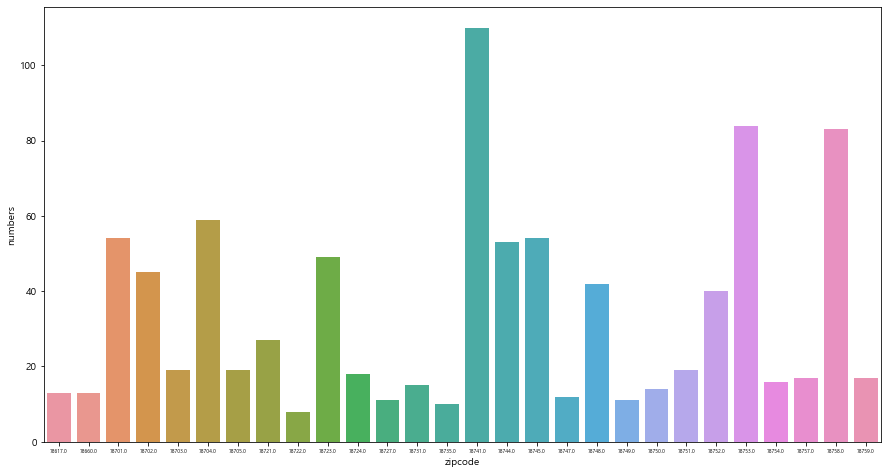

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (15,8))
plt.rc('font', family = "Malgun Gothic")
graph=sns.barplot(x='zipcode', y='numbers', data = df)
plt.xticks(rotation=0, fontsize=5)

In [42]:
url = "https://data.austintexas.gov/resource/fdj4-gpfu.geojson"
state_geo = f"{url}"

m = folium.Map(location=[30, -97], zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df,
    columns=["zipcode", "numbers"],
    key_on="feature.properties.crime_type",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Crime Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m
